In [1]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt
import PIL

In [2]:
file_name = r"D:\Dataset\brain_multicoil_challenge_transfer\brain_multicoil_challenge_transfer~\multicoil_challenge_transfer\challenge_brain_Philips_6951017076_AXFLAIRTSE.h5"
hf = h5py.File(file_name)

In [3]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['ismrmrd_header', 'kspace', 'mask']
Attrs: {'acceleration': 4, 'acquisition': 'AXFLAIRTSE', 'num_low_frequency': 26, 'patient_id': 'b9c6ff6e89c0ced012ca5b31777e11144ab2aed862479e26055a5efa9725c299'}


In [4]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

complex64
(22, 32, 640, 320)


In [5]:
slice_kspace = volume_kspace[19] # Choosing the 20-th slice of this volume

In [6]:
def show_coils(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

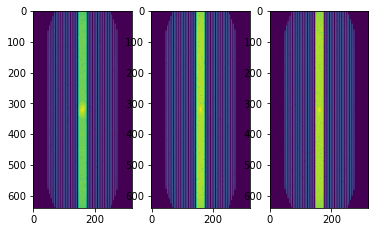

In [7]:
show_coils(np.log(np.abs(slice_kspace) + 1e-9), [0, 5, 10])  # This shows coils 0, 5 and 10

In [8]:
import fastmri
from fastmri.data import transforms as T

In [9]:
slice_kspace2 = T.to_tensor(slice_kspace)      # Convert from numpy array to pytorch tensor
slice_image = fastmri.ifft2c(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
slice_image_abs = fastmri.complex_abs(slice_image)   # Compute absolute value to get a real image

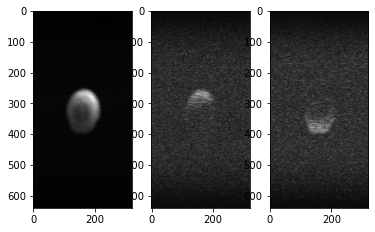

In [10]:
show_coils(slice_image_abs, [0, 5, 10], cmap='gray')

In [11]:
slice_image_rss = fastmri.rss(slice_image_abs, dim=0)

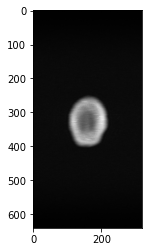

In [12]:
plt.imshow(np.abs(slice_image_rss.numpy()), cmap='gray')

In [13]:
from fastmri.data.subsample import RandomMaskFunc
mask_func = RandomMaskFunc(center_fractions=[0.04], accelerations=[8])  # Create the mask function object

In [14]:
masked_kspace, mask, _ = T.apply_mask(slice_kspace2, mask_func)   # Apply the mask to k-space

In [15]:
sampled_image = fastmri.ifft2c(masked_kspace)           # Apply Inverse Fourier Transform to get the complex image
sampled_image_abs = fastmri.complex_abs(sampled_image)   # Compute absolute value to get a real image
sampled_image_rss = fastmri.rss(sampled_image_abs, dim=0)

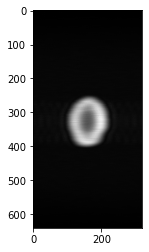

In [16]:
plt.imshow(np.abs(sampled_image_rss.numpy()), cmap='gray')

In [27]:
plt.imsave('cringe1.png', np.abs(slice_image_rss.numpy()), cmap='gray')
plt.imsave('cringe_mask.png', np.abs(sampled_image_rss.numpy()), cmap='gray')